Time used: 1.3084731101989746s


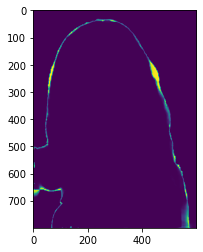

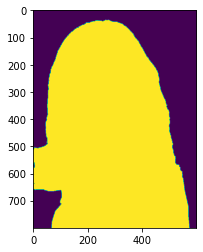

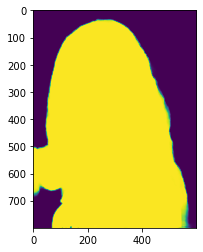

True

In [4]:
import cv2
import time
import matplotlib.pyplot as plt
import segmentation_refinement as refine
image = cv2.imread('test1.jpg')
mask = cv2.imread('result_png.png', cv2.IMREAD_GRAYSCALE)

# model_path can also be specified here
# This step takes some time to load the model
refiner = refine.Refiner(device='cuda:0') # device can also be 'cpu'

# Fast - Global step only.
# Smaller L -> Less memory usage; faster in fast mode.
start = time.time()
for i in range(1):
    output = refiner.refine(image, mask, fast=True)
end = time.time()
print("Time used: {}s".format((end - start) / 1)) 
test_im = cv2.bitwise_xor(mask, output)
plt.imshow(test_im)
plt.show()
plt.imshow(mask)
plt.show()
plt.imshow(output)
plt.show()
cv2.imwrite('result_refine.png', output)